In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/table.csv')
df.head()

,Paper,Host-DNA depletion,Microbial enrichment,Sequencing technology,Sequencing depth (Gbp),Tissue,Disease,Data public,Sample size (n),Bioinformatics tools,Fresh or frozen samples
0,2017,Yes,No,Illumina HiSeq 2500,X,Bone and joint,Bone and joint infections,No,47,"MetaPhlAn2, Kraken, Bowtie2",Frozen
1,2019,Yes,No,Illumina MiSeq,0.5,Aortic valve,Infective endocarditis,Yes,1,"CLARK, MetaPhlAn2, mothur, UBLAST",Frozen
2,2019,No,Yes,Illumina MiSeq,0.041,Aortic valve,Infective endocarditis,Yes,1,"CLARK, USEARCH, MetaPhlAn2, BWA, BLAST",Frozen
3,2019,No,No,Illumina MiSeq,?,Cerebrospinal fluid,Toscana virus,Yes,1,"TOSV, SmaltAlign, VirMet",Fresh
4,2019,No,No,Illumina GAIIx,0.07,Sputum,Polymicrobial infections,Yes,3,"SMALT, BLASTn",Frozen


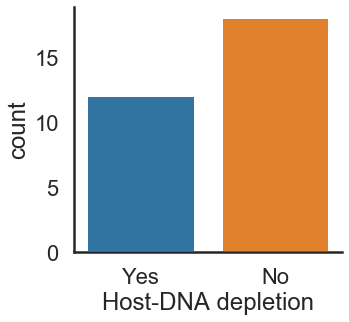

In [3]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Host-DNA depletion',kind="count",data=df)
g=sns.despine()

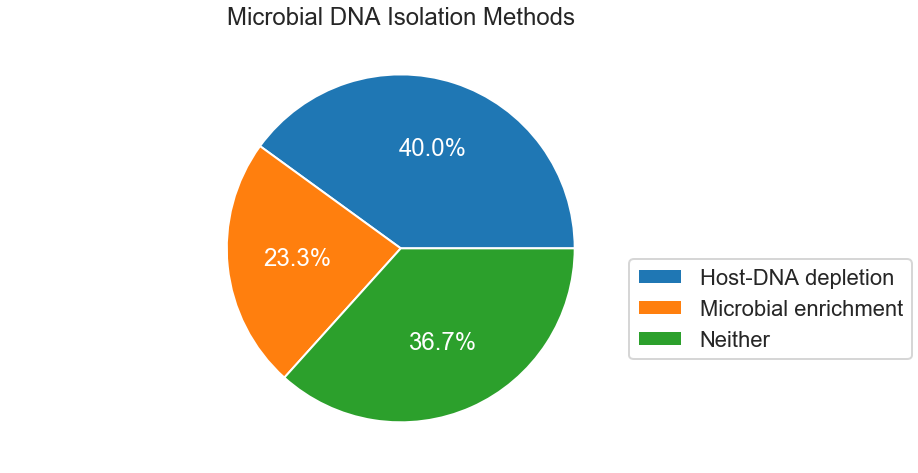

In [4]:
seq = pd.DataFrame({'ratio': [12, 7, 11]}, index=['Host-DNA depletion','Microbial enrichment', 'Neither'])
plot = seq.plot.pie(subplots=True, figsize=(8,8), autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel("", color = "black")
plt.title("Microbial DNA Isolation Methods")
plt.savefig('../figures/isolation_methods_all.png',bbox_inches='tight')

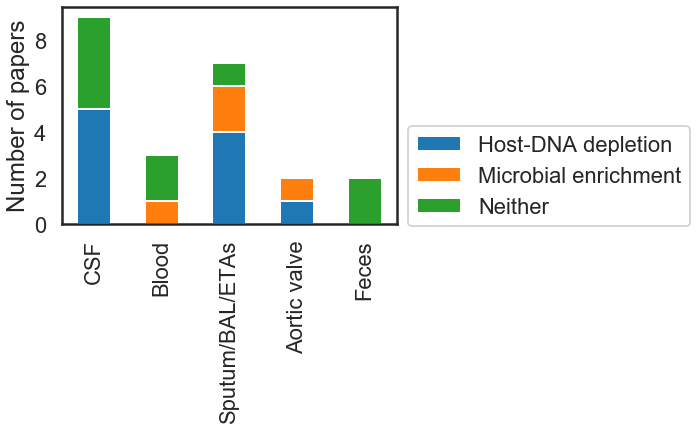

In [19]:
N = 6
host = [5,0,4,1,0]
enrich = [0,1,2,1,0]
nope = [4,2,1,0,2]
position = [0,2,4,6,8]
BarWidth = 1

two_bottom = np.add(host, enrich)

#Host depletion
p1 = plt.bar(position, host, width=BarWidth)
#enrichment
p2 = plt.bar(position, enrich, width=BarWidth, bottom=host)
#Neither
p3 = plt.bar(position, nope, width=BarWidth, bottom=two_bottom)

plt.ylabel('Number of papers')
plt.xticks(position, ('CSF', 'Blood', 'Sputum/BAL/ETAs', 'Aortic valve','Feces'))
plt.yticks(np.arange(0, 10, 2))
plt.legend((p1[0], p2[0], p3[0]), ('Host-DNA depletion', 'Microbial enrichment', 'Neither'), loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.savefig('../figures/isolation_methods.png', bbox_inches='tight')

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


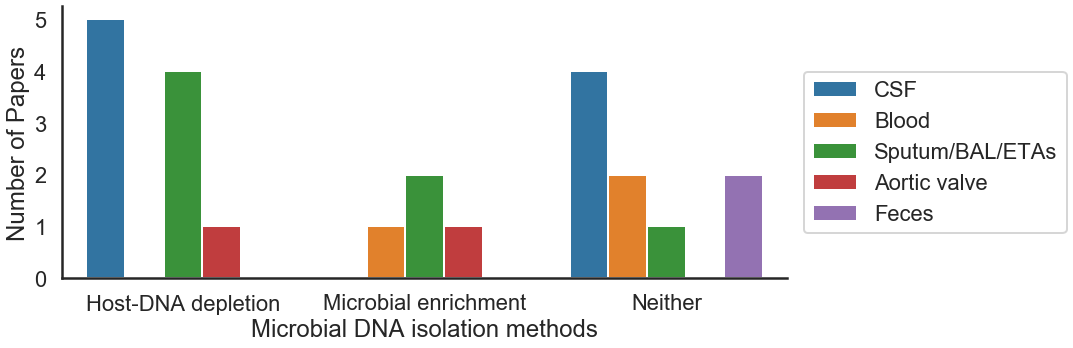

In [6]:
plt.figure(figsize=(13,5))
sns.set_style('white')
sns.set_context('poster')

samples = ['Host-DNA depletion','Microbial enrichment','Neither']
sample_df = pd.read_csv('../data/flag_tissue.csv')
          
cc_df = sample_df.loc[:, ['flag', 'Microbial isolation methods']]
cc_df['count'] = 'Exists'
#mf_df.head()
cc_group = cc_df.groupby(['Microbial isolation methods', 'flag'], as_index=False).count().rename(columns={'count':'count'})

g=sns.barplot(x='Microbial DNA isolation methods', y="count", hue="flag", data = sample_df)
g.set(ylabel = "Number of Papers")
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 0.8))
g.set_xticklabels(rotation=0, labels = samples)
sns.despine()

plt.show()

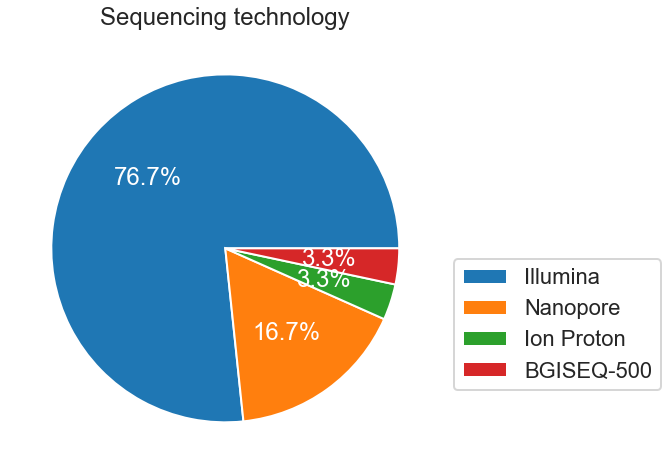

In [7]:
seq = pd.DataFrame({'Sequencing technology': [23, 5, 1,1]}, index=['Illumina', 'Nanopore', 'Ion Proton','BGISEQ-500']) 
plot = seq.plot.pie(y = 'Sequencing technology', figsize=(8,8),legend=None, autopct='%1.1f%%', textprops = {'color':"w"}) 
plt.legend(loc='best', bbox_to_anchor=(1, 0.5)) 
plt.ylabel("") 
plt.title("Sequencing technology") 
plt.savefig("../figures/seq_tech.png",bbox_inches='tight')

In [8]:
biot = pd.read_csv('../data/biotools.csv')
biot['bioinformatics tools'].value_counts()

BLAST                      10
MetaPhlAn2                  7
Kraken                      6
Bowtie2                     6
BWA                         6
Minimap2                    4
Canu                        4
CLARK                       3
USEARCH                     2
WIMP                        2
ABRicate                    2
RepeatMasker                2
Prokka                      2
BioBloom                    2
LMAT                        2
UBLAST                      2
IDBA-UD                     2
Pilon                       2
BBMap                       2
ESOM                        2
Geneious                    2
GSNAPL                      2
Snippy                      2
SPAdes                      2
cd-hit-dup                  2
mlst                        2
Porechop                    2
mothur                      2
SAMtools                    1
Blast2GO                    1
Fast5-to-Fastq              1
DIAMOND                     1
SLURM                       1
Plot2     

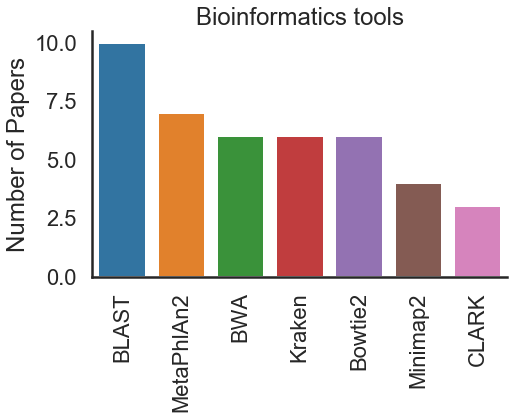

In [23]:
#table = pd.DataFrame({'bioinformatics tools': [9,7,6,6,6,4,3]}, index=['BLAST','MetaPhlAn2','BWA','Kraken','Bowtie2','Minimap2','CLARK'])
#plot = table.plot.pie(subplots=True, figsize=(8,8),legend=None)
#plt.ylabel("")

sns.set_style('white')
sns.set_context('poster')
g=sns.catplot(y='count',x='Bioinformatics tools',kind='bar',data=pd.read_csv('../data/biotools_count.csv'),aspect=1.5)
g.set(ylabel = "Number of Papers")
g.set(xlabel = "")
plt.title("Bioinformatics tools")
plt.xticks(rotation=90,ha="center")
plt.savefig('../figures/bioinformatics_tools_bar.png',bbox_inches='tight')

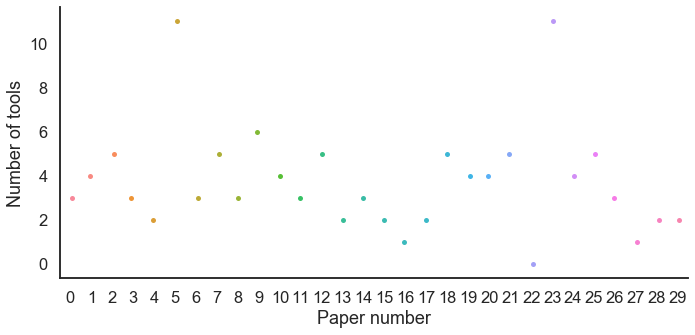

In [25]:
tl = pd.read_csv('../data/nm.of.tools.csv')
sns.set_style('white')
sns.set_context('talk')
ax = sns.catplot(data = tl, x = 'Paper number', y = 'Number of tools',aspect = 2)
sns.despine()
#plt.show()
plt.savefig('../figures/nm.tools.png')
#plt.savefig('../figures/Figure2_e_0.pdf')

In [20]:
dis = pd.read_csv('../data/disease.csv')
dis['disease'].value_counts()

Central nervous system infections    8
Lower respiratory infections         8
Prosthetic joint infections          3
Infective endocarditis               2
Polymicrobial infections             1
Prosthetic Joint Infections          1
Bone and joint infections            1
Name: disease, dtype: int64

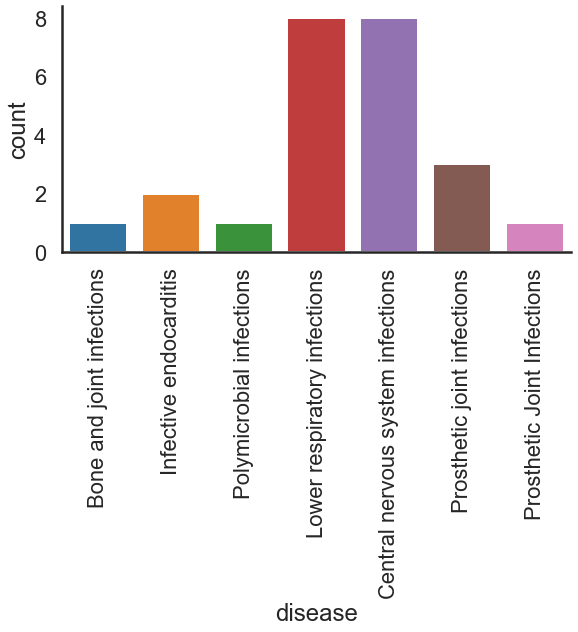

In [21]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='disease',kind="count",data=dis,aspect=2)
plt.xticks(rotation=90)
plt.savefig('../figures/disease_bar.png',bbox_inches='tight')

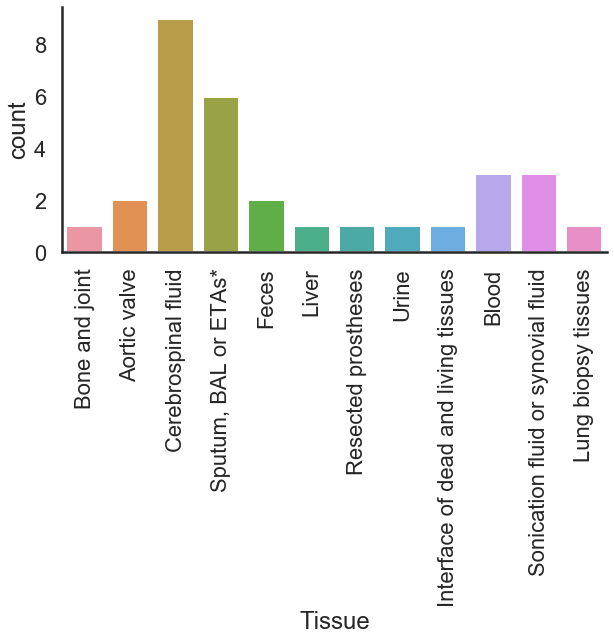

In [22]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Tissue',kind="count",data=pd.read_csv('../data/tissue_count.csv'),aspect=2)
plt.xticks(rotation=90)
plt.savefig('../figures/tissue_count.png',bbox_inches='tight')

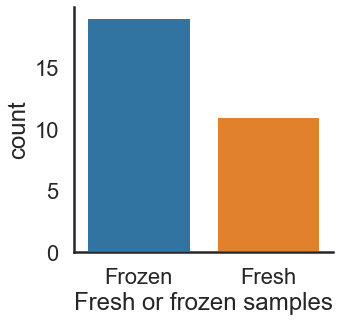

In [23]:
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.catplot(x='Fresh or frozen samples',kind="count",data=df)
g=sns.despine()

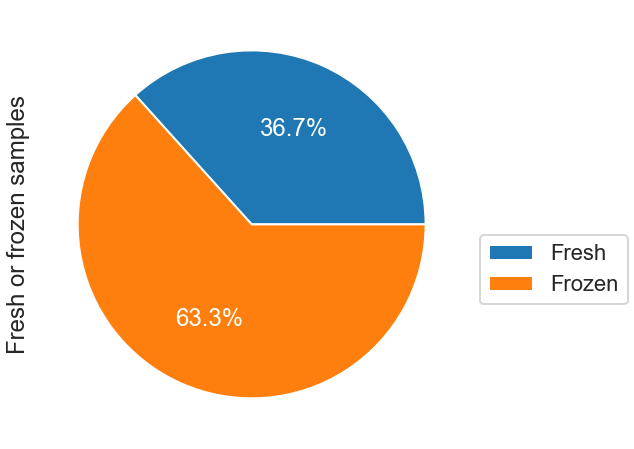

In [25]:
table = pd.DataFrame({'Fresh or frozen samples': [11,19]}, index=['Fresh','Frozen'])

plot = table.plot.pie(y = 'Fresh or frozen samples', figsize=(8,8),autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

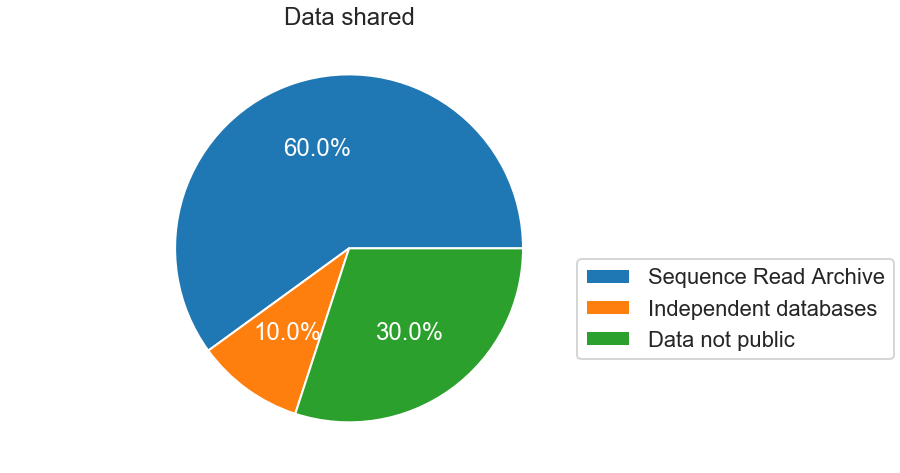

In [26]:
table = pd.DataFrame({'Data shared': [18,3,9]}, index=['Sequence Read Archive','Independent databases','Data not public'])

plot = table.plot.pie(y = 'Data shared', figsize=(8,8),autopct='%1.1f%%', textprops = {'color':"w"})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel("") 
plt.title("Data shared") 
plt.savefig("../figures/data_public.png",bbox_inches='tight')